In [1]:
from Functions import *

Sample start date:  2005-02-11 00:00:30 
Sample end date: 2005-02-11 19:41:30
['2005-02-11 08:01:30', '2005-02-11 08:18:30', '2005-02-11 19:23:30']


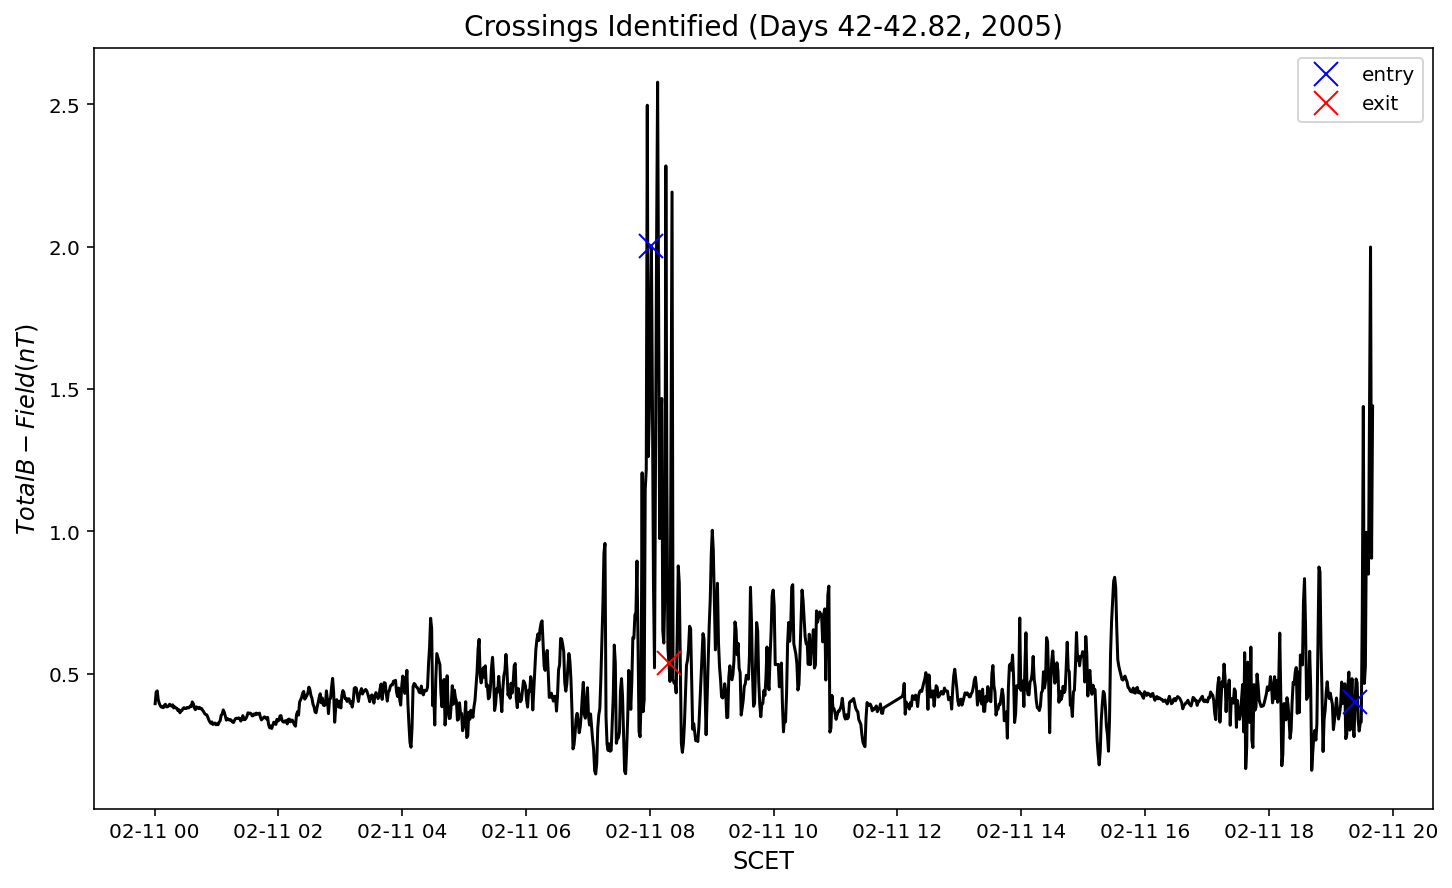

In [2]:
windowsize = 7
estimatedNumCrossings = 15
year=2005
start_day1 =42
end_day1 = 42.82

day_data1_2004 = get_day_data(start_day1, end_day1, year)
#plot_KSM(day_data1_2004, year, start_day1, end_day1, xFormat = "Hour")
entries1, exits1, ax1, ksmcoords_1,cross_array1 = identify_crossings_2(day_data1_2004, windowsize, estimatedNumCrossings,3,2,360)
plt.title("Crossings Identified (Days {}-{}, {})".format(start_day1, end_day1,year),fontsize = 14)

print(cross_array1)

Sample start date:  2005-02-24 00:00:30 
Sample end date: 2005-03-05 19:12:30
['2005-02-24 08:48:30', '2005-03-01 07:31:30', '2005-03-01 16:07:30', '2005-03-04 16:06:30', '2005-03-04 19:06:30', '2005-03-05 16:39:30', '2005-03-05 17:04:30', '2005-03-05 18:39:30']


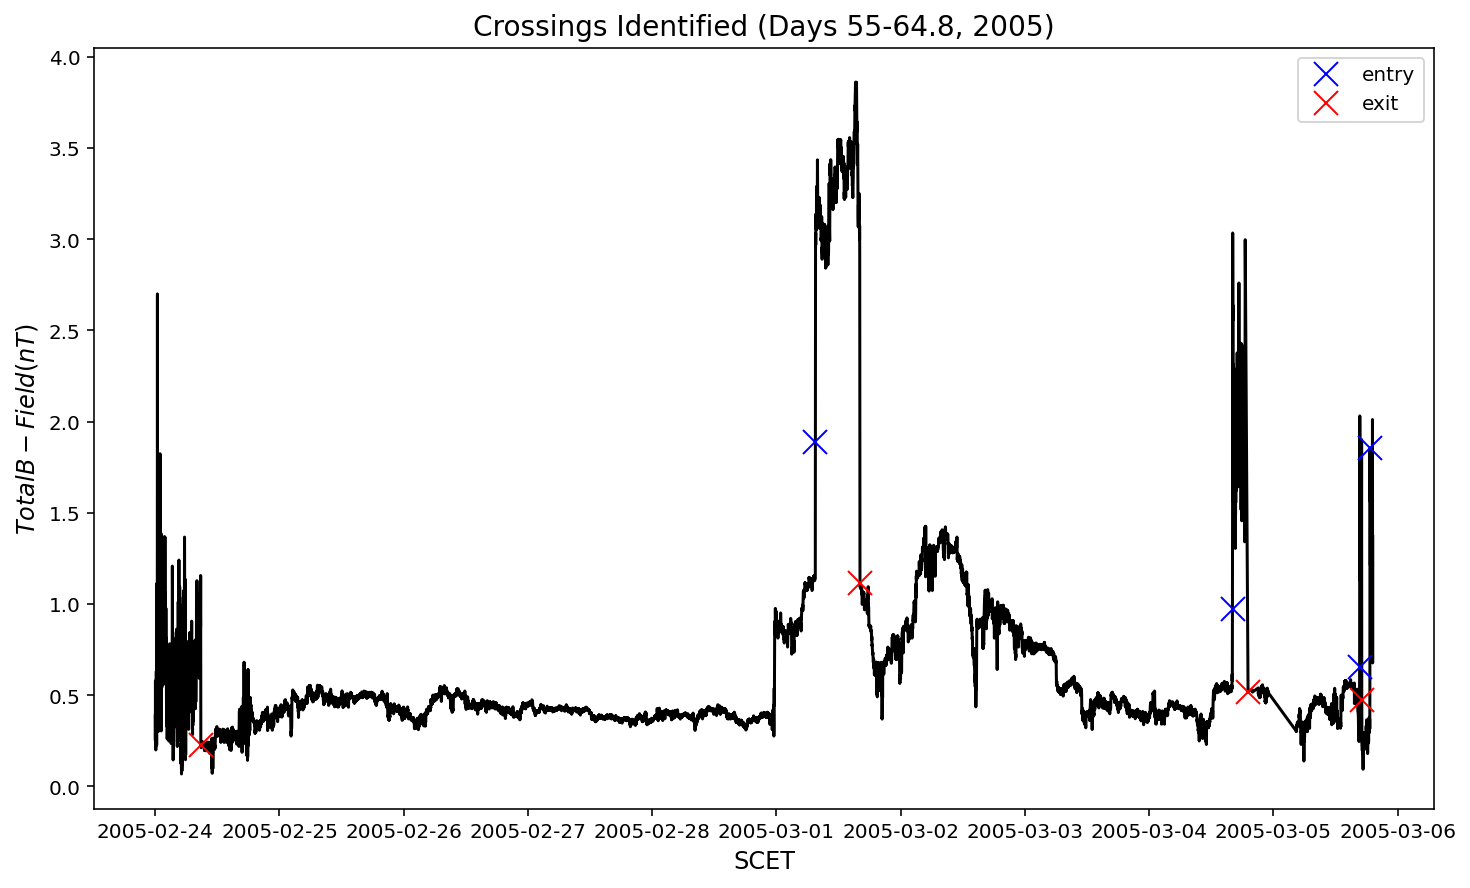

In [3]:
estimatedNumCrossings = 8

start_day2 = 55
end_day2 = 64.8
day_data2_2004 = get_day_data(start_day2, end_day2, year)
#plot_KSM(day_data2_2004, year, start_day2, end_day2, xFormat = "Hour")
entries2, exits2, ax2, ksmcoords_2,cross_array2 = identify_crossings_2(day_data2_2004, windowsize, estimatedNumCrossings,3,2,110)
plt.title("Crossings Identified (Days {}-{}, {})".format(start_day2, end_day2,year),fontsize = 14)

print(cross_array2)

In [4]:
cross_array = cross_array1 + cross_array2
print('crossing dates',cross_array)
day_data_2004 = get_day_data(start_day1,end_day2,year)
day_data_2004.index.strftime('%Y-%m-%d %H:%M:%S')

crossing dates ['2005-02-11 08:01:30', '2005-02-11 08:18:30', '2005-02-11 19:23:30', '2005-02-24 08:48:30', '2005-03-01 07:31:30', '2005-03-01 16:07:30', '2005-03-04 16:06:30', '2005-03-04 19:06:30', '2005-03-05 16:39:30', '2005-03-05 17:04:30', '2005-03-05 18:39:30']


Sample start date:  2005-02-11 00:00:30 
Sample end date: 2005-03-05 19:12:30


Index(['2005-02-11 00:00:30', '2005-02-11 00:01:30', '2005-02-11 00:02:30',
       '2005-02-11 00:03:30', '2005-02-11 00:04:30', '2005-02-11 00:05:30',
       '2005-02-11 00:06:30', '2005-02-11 00:07:30', '2005-02-11 00:08:30',
       '2005-02-11 00:09:30',
       ...
       '2005-03-05 19:02:30', '2005-03-05 19:03:30', '2005-03-05 19:04:30',
       '2005-03-05 19:05:30', '2005-03-05 19:06:30', '2005-03-05 19:07:30',
       '2005-03-05 19:08:30', '2005-03-05 19:09:30', '2005-03-05 19:10:30',
       '2005-03-05 19:11:30'],
      dtype='object', name='Time', length=31932)

In [5]:
offset=4
mins=8+offset

b1, b2 = extract_B_vector3(cross_array, day_data_2004, mins,offset)

type1 = ['entry', 'exit', 'entry', 'exit' ,'entry', 'exit','entry', 'exit', 'entry', 'exit' ,'entry']
num = np.arange(1, len(cross_array)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)

S=1 θ_BN value = 28.0403279584456
Standard deviation = 17.556035781128593
S=2 θ_BN value = 31.14491892188481
Standard deviation = 19.331755605109905
S=3 θ_BN value = 30.764942328430152
Standard deviation = 18.98843017831527
S=4 θ_BN value = 62.05151615241415
Standard deviation = 11.340148729483097
S=5 θ_BN value = 64.33767688449257
Standard deviation = 4.768910094000001
S=6 θ_BN value = 76.90051396424707
Standard deviation = 5.5505731043460536
S=7 θ_BN value = 74.52447477900185
Standard deviation = 7.2189291366825445
S=8 θ_BN value = 71.19660404936494
Standard deviation = 6.541896778944721
S=9 θ_BN value = 62.17565373442885
Standard deviation = 14.232802023759527
S=10 θ_BN value = 44.92833359954156
Standard deviation = 13.597843201203343
S=11 θ_BN value = 44.251610085140314
Standard deviation = 5.919639711871615


Text(0, 0.5, 'Skewness of ${\\Theta}_{BN}$')

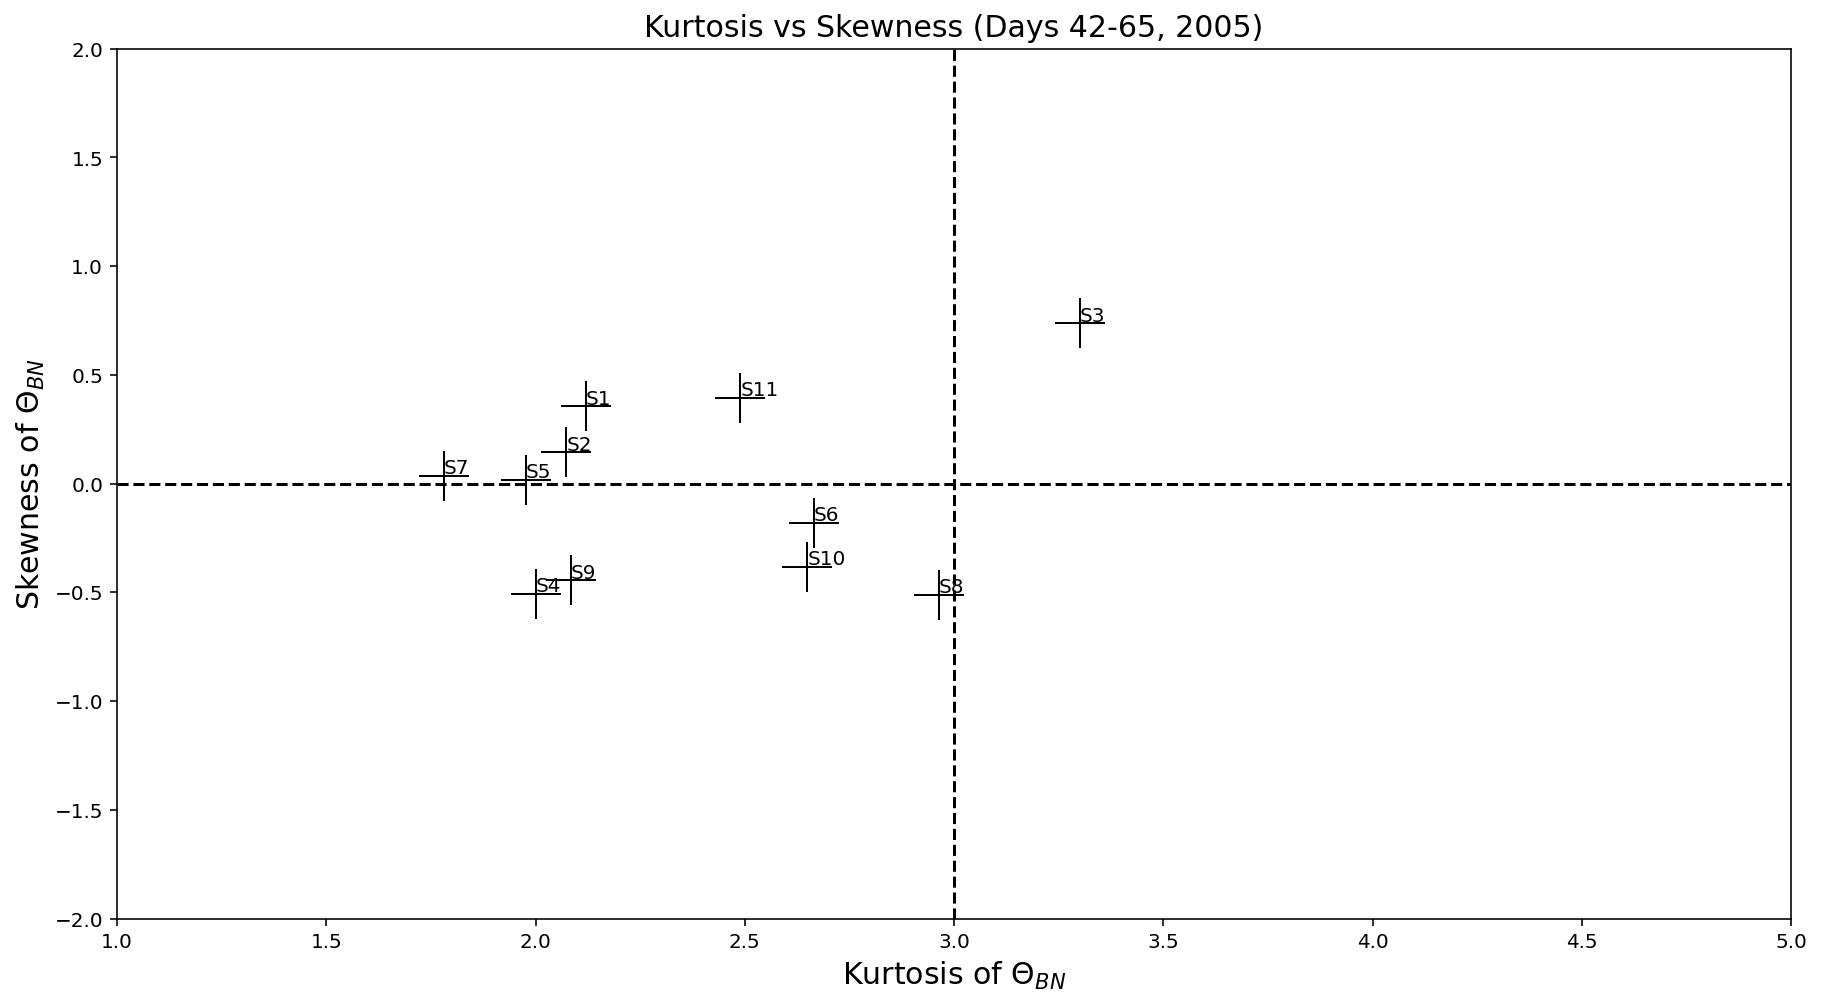

In [6]:
Plot_Dist_for_theta([*shock_v])
plt.title("Kurtosis vs Skewness (Days 42-65, 2005)", fontsize = 15)
plt.xlabel("Kurtosis of ${\Theta}_{BN}$", fontsize = 15)
plt.ylabel("Skewness of ${\Theta}_{BN}$", fontsize = 15)

In [7]:
def plotncp(day_data,cross_array,scal,ave_ncp,std_ncp,point1,point2):
    plt.figure(figsize=(10,12))
    a=[]
    b=[]
    c=[]

    #x.invert_yaxis()
    #ax.plot(day_data['X'],day_data['Rs'],color='k',label='orbit path')
    for i in range(len(cross_array)):
        X=day_data.loc[cross_array[i],'X']
        RHO=day_data.loc[cross_array[i],'Rs']
        Y=day_data.loc[cross_array[i],'Y']
        Z=day_data.loc[cross_array[i],'Z']
        plt.plot(X,RHO,'o',color='k')
        S='S'+str(i+1)
        plt.annotate(S, (X-0.7,RHO) )
        x_ncp=ave_ncp[i][0]
        y_ncp=ave_ncp[i][1]
        z_ncp=ave_ncp[i][2]
        sx_ncp=std_ncp[i][0]
        sy_ncp=std_ncp[i][1]
        sz_ncp=std_ncp[i][2]
        
        dot=[Y,Z]/RHO
        rho_ncp=np.dot([y_ncp,z_ncp],dot)
        srho_ncp=np.dot([sy_ncp,sz_ncp],dot)
        errorr=srho_ncp*scal
        errorx=sx_ncp*scal
        plt.plot(X,RHO,'o',color='k')
        if (x_ncp*scal)>=0:
            plt.plot([X,X+(x_ncp*scal)],[RHO,RHO+(rho_ncp*scal)],color='k')
            plt.errorbar(X+(x_ncp*scal),RHO+(rho_ncp*scal),xerr=errorx,yerr=errorr,color='k')
        else:
            plt.plot([X,X+(x_ncp*-scal)],[RHO,RHO+(rho_ncp*-scal)],color='k')
            plt.errorbar(X+(x_ncp*-scal),RHO+(rho_ncp*-scal),xerr=errorx,yerr=errorr,color='k')
        
        a.append(x_ncp)
        b.append(rho_ncp)
        c.append(srho_ncp)
    #ax.legend()
    
    
    plt.gca().invert_yaxis
    plotcross(day_data,cross_array,point1,point2,ave_ncp,std_ncp)
    return a,b,c

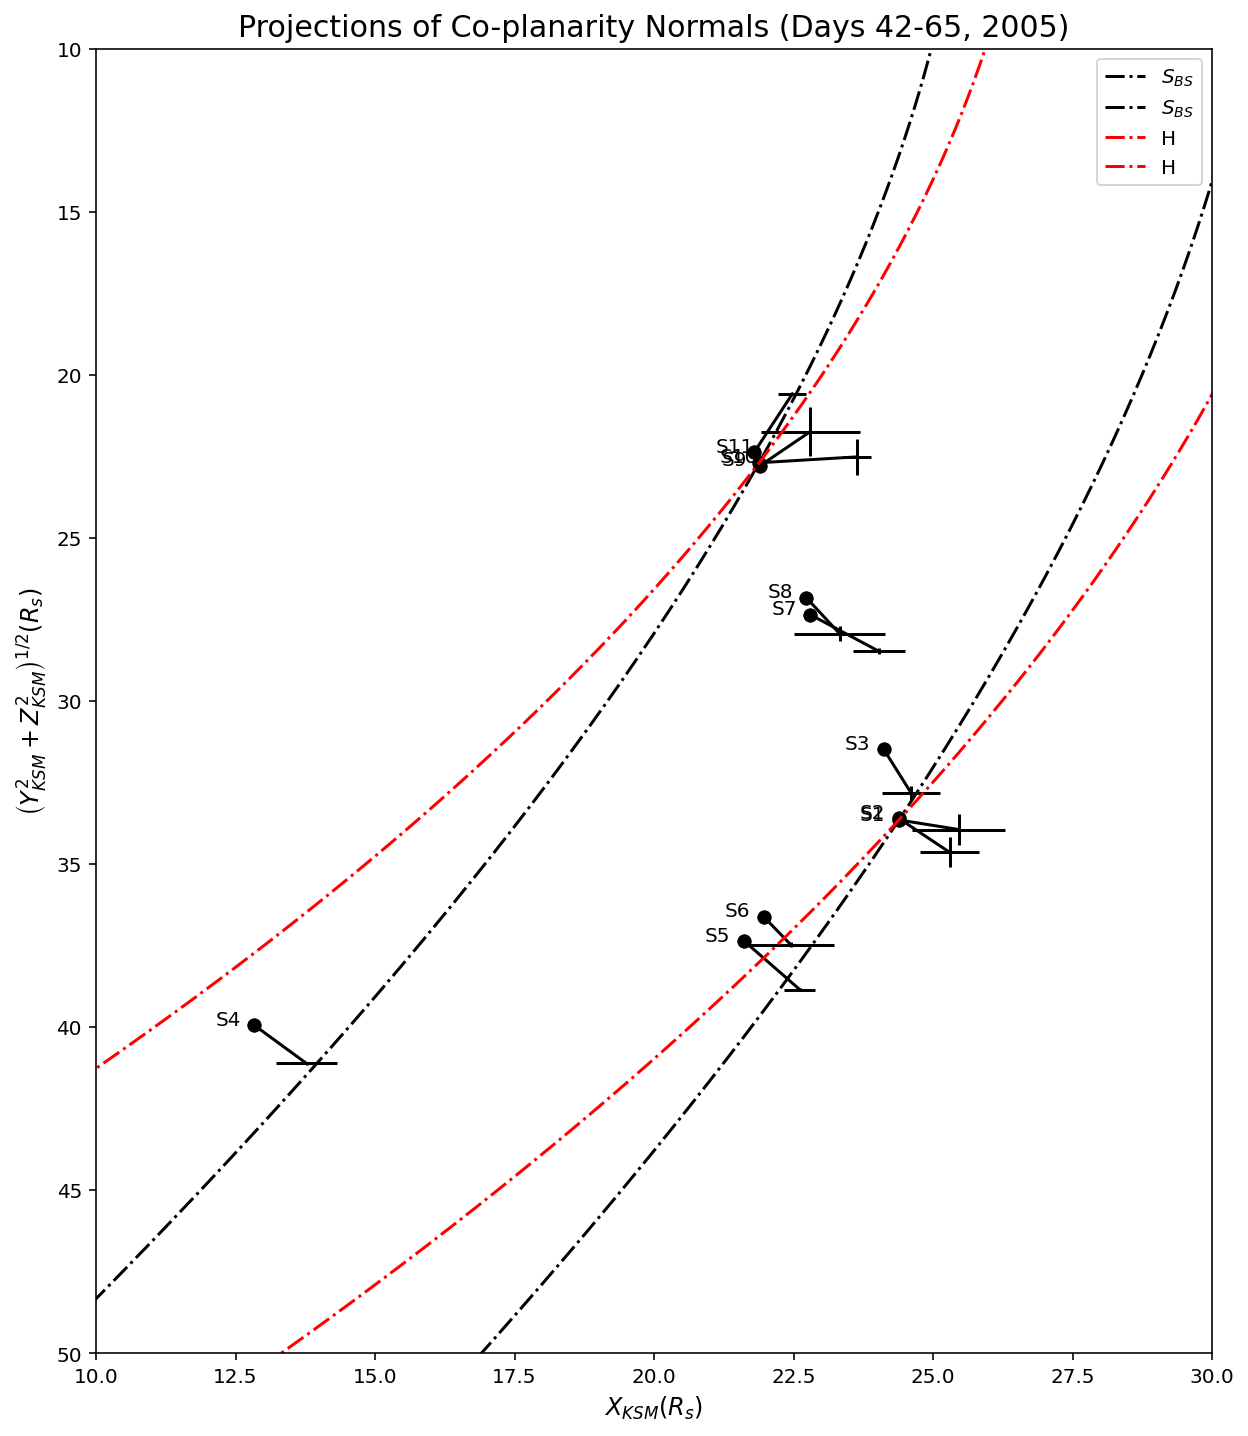

In [8]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data_2004,cross_array,-2,ave_ncp,std_ncp,1,10)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title("Projections of Co-planarity Normals (Days 42-65, 2005)", fontsize = 15)
plt.ylim(10,50)
plt.xlim(10,30)
plt.gca().invert_yaxis()

Theta_CPM  [12.94672496043195, 20.51377825566999, 42.41804748861273, 13.487376584667757, 24.80867349595127, 29.69662195561481, 16.1620015209037, 35.61247095574515, 73.35545991248546, 29.88564793451576, 87.03038134973704]
Std [17.483553097811047, 13.297868724014785, 14.740518205042049, 12.228914446687583, 6.62560940147191, 19.72919397586198, 8.144346168555462, 20.349556748661723, 9.783386637785547, 17.382219033094565, 6.980069594007937]


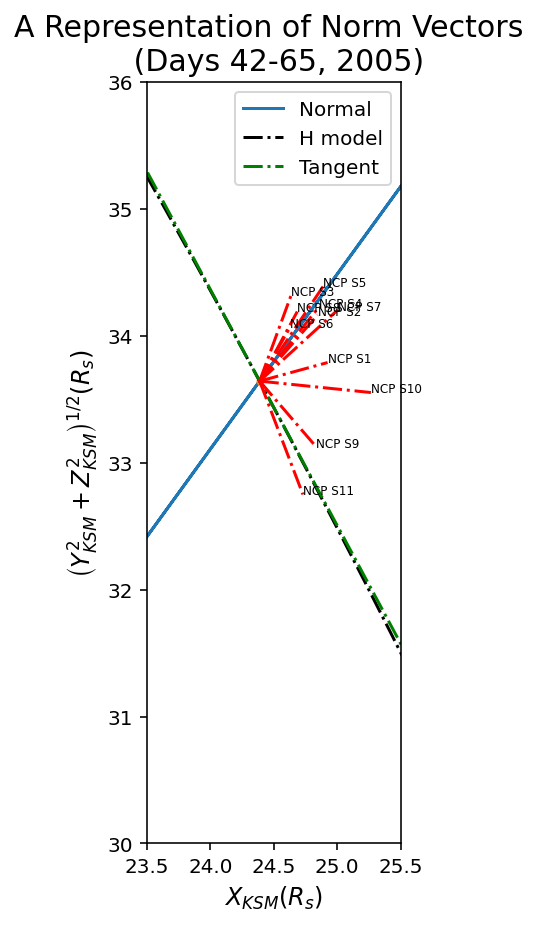

In [9]:
t,st=calCPM(day_data_2004,cross_array,ave_ncp,rho_ncp,std_ncp,srho_ncp)
plt.ylim(30,36)
plt.xlim(23.5,25.5)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title('A Representation of Norm Vectors \n (Days 42-65, 2005)',fontsize = 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

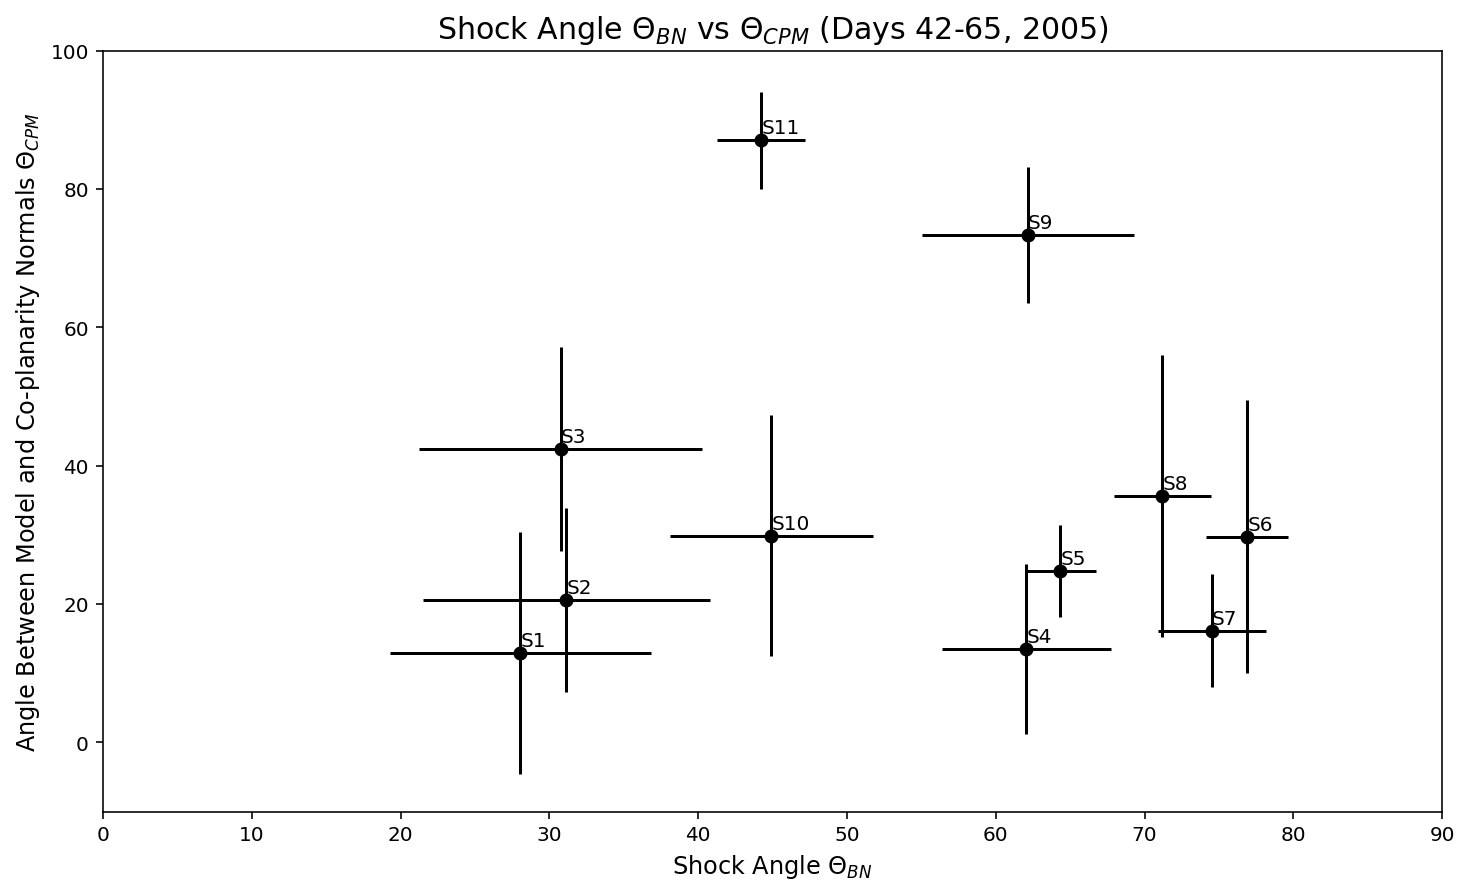

In [10]:

plt.figure()
plt.plot(ave_shock,t,'.')
plt.xlabel('Shock Angle ${\Theta}_{BN}$',fontsize = 12)
plt.ylabel('Angle Between Model and Co-planarity Normals ${\Theta}_{CPM}$ ',fontsize = 12)
plt.title('Shock Angle ${\Theta}_{BN}$ vs ${\Theta}_{CPM}$ (Days 42-65, 2005)',fontsize = 15)
plt.errorbar(ave_shock,t,xerr=std/2,yerr=st,fmt='o',color='k')
plt.ylim(-10,100)
plt.xlim(0,90 )
for i in range(len(srho_ncp)):
    S='S'+str(i+1)
    plt.annotate(S, (ave_shock[i],t[i]+1) )